In [1]:
# a simple tokenization example as discussed in course (Build and Train LLLM)

In [10]:
import re
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [11]:
# input text corpus
text = ['All that we are is the result of what we have thought',
        'To be or not to be that is the question',
        'Be yourself everyone else is already taken']
text

['All that we are is the result of what we have thought',
 'To be or not to be that is the question',
 'Be yourself everyone else is already taken']

In [12]:
#separate into words by splitting by spaces
import re
re.split('\s', text[0])


['All',
 'that',
 'we',
 'are',
 'is',
 'the',
 'result',
 'of',
 'what',
 'we',
 'have',
 'thought']

In [13]:
# recombine into text

' '.join(re.split('\s', text[0]))

'All that we are is the result of what we have thought'

In [14]:
# also make lower case
allwords = re.split('\s', ' '.join(text).lower())
allwords

['all',
 'that',
 'we',
 'are',
 'is',
 'the',
 'result',
 'of',
 'what',
 'we',
 'have',
 'thought',
 'to',
 'be',
 'or',
 'not',
 'to',
 'be',
 'that',
 'is',
 'the',
 'question',
 'be',
 'yourself',
 'everyone',
 'else',
 'is',
 'already',
 'taken']

## create a vocab

In [15]:
# get the unique words
vocab = sorted(set(allwords))
vocab

['all',
 'already',
 'are',
 'be',
 'else',
 'everyone',
 'have',
 'is',
 'not',
 'of',
 'or',
 'question',
 'result',
 'taken',
 'that',
 'the',
 'thought',
 'to',
 'we',
 'what',
 'yourself']

In [16]:
print(f'There are {len(allwords)} words in the text, and {len(vocab)} words in vocab')

There are 29 words in the text, and 21 words in vocab


### Create an encoder and decoder 

In [17]:
# encoder is a python dict type

word2idx = {}
for idx, word in enumerate(vocab):
    word2idx[word] = idx
word2idx

{'all': 0,
 'already': 1,
 'are': 2,
 'be': 3,
 'else': 4,
 'everyone': 5,
 'have': 6,
 'is': 7,
 'not': 8,
 'of': 9,
 'or': 10,
 'question': 11,
 'result': 12,
 'taken': 13,
 'that': 14,
 'the': 15,
 'thought': 16,
 'to': 17,
 'we': 18,
 'what': 19,
 'yourself': 20}

In [18]:
# and a decoder

idx2word = {}
for idx,word in enumerate(vocab):
    idx2word[idx] = word
idx2word

{0: 'all',
 1: 'already',
 2: 'are',
 3: 'be',
 4: 'else',
 5: 'everyone',
 6: 'have',
 7: 'is',
 8: 'not',
 9: 'of',
 10: 'or',
 11: 'question',
 12: 'result',
 13: 'taken',
 14: 'that',
 15: 'the',
 16: 'thought',
 17: 'to',
 18: 'we',
 19: 'what',
 20: 'yourself'}

In [19]:
# or use dict comprehension
word2idx = {word:i  for i,word in enumerate(vocab)}
idx2word = {i:word for i,word in enumerate(vocab)}
word2idx

{'all': 0,
 'already': 1,
 'are': 2,
 'be': 3,
 'else': 4,
 'everyone': 5,
 'have': 6,
 'is': 7,
 'not': 8,
 'of': 9,
 'or': 10,
 'question': 11,
 'result': 12,
 'taken': 13,
 'that': 14,
 'the': 15,
 'thought': 16,
 'to': 17,
 'we': 18,
 'what': 19,
 'yourself': 20}

In [20]:
print(f'The word "to" has index {word2idx["to"]}')
print(f'The index "7" maps to word "{idx2word[7]}"')

The word "to" has index 17
The index "7" maps to word "is"


In [21]:
## encoders and decoders as a Python func

In [22]:
# ecnoder func
def encoder(text):
    # parse the text into words
    words = re.split(' ', text.lower())
    
    #return vector of indices
    return [word2idx[w] for w in words]

# decoder func
def decoder(indices):
    #find the words for these indices, and join into one string
    return ' '.join([idx2word[i] for i in indices])

In [23]:
# create new sentence
newtext = 'we already are the result of what '\
            'everyone else already thought'
newtext_tokenIDs = encoder(newtext)
decoded_text = decoder(newtext_tokenIDs)

print('Original text:')
print(f'\t{newtext}')

print(f'TokenIDs:')
print(f'\t{newtext_tokenIDs}')


print(f'Decoded text:')
print(f'\t{decoded_text}')

Original text:
	we already are the result of what everyone else already thought
TokenIDs:
	[18, 1, 2, 15, 12, 9, 19, 5, 4, 1, 16]
Decoded text:
	we already are the result of what everyone else already thought


## Make random fake quotes

In [24]:
# select random words from dict
import numpy as np
randidx = np.random.randint(0,len(vocab),size=5)

In [25]:
[idx2word[i] for i in randidx]

['or', 'be', 'everyone', 'else', 'or']

In [26]:
' '.join([idx2word[i] for i in randidx])

'or be everyone else or'

## a peak at tokenization


In [27]:
# translate text into numbers

text_as_int = [word2idx[word] for word in allwords]
text_as_int

[0,
 14,
 18,
 2,
 7,
 15,
 12,
 9,
 19,
 18,
 6,
 16,
 17,
 3,
 10,
 8,
 17,
 3,
 14,
 7,
 15,
 11,
 3,
 20,
 5,
 4,
 7,
 1,
 13]

In [28]:
# and numbers back to text
for tokenid in text_as_int:
    print(f'Token {tokenid:2}: {idx2word[tokenid]}')

Token  0: all
Token 14: that
Token 18: we
Token  2: are
Token  7: is
Token 15: the
Token 12: result
Token  9: of
Token 19: what
Token 18: we
Token  6: have
Token 16: thought
Token 17: to
Token  3: be
Token 10: or
Token  8: not
Token 17: to
Token  3: be
Token 14: that
Token  7: is
Token 15: the
Token 11: question
Token  3: be
Token 20: yourself
Token  5: everyone
Token  4: else
Token  7: is
Token  1: already
Token 13: taken


## VISUALISING THE TOKENS

In [29]:
text

['All that we are is the result of what we have thought',
 'To be or not to be that is the question',
 'Be yourself everyone else is already taken']

[[<matplotlib.axis.YTick at 0x10a50c310>,
 [Text(1, 0, 'all'),
  Text(1, 1, 'already'),
  Text(1, 2, 'are'),
  Text(1, 3, 'be'),
  Text(1, 4, 'else'),
  Text(1, 5, 'everyone'),
  Text(1, 6, 'have'),
  Text(1, 7, 'is'),
  Text(1, 8, 'not'),
  Text(1, 9, 'of'),
  Text(1, 10, 'or'),
  Text(1, 11, 'question'),
  Text(1, 12, 'result'),
  Text(1, 13, 'taken'),
  Text(1, 14, 'that'),
  Text(1, 15, 'the'),
  Text(1, 16, 'thought'),
  Text(1, 17, 'to'),
  Text(1, 18, 'we'),
  Text(1, 19, 'what'),
  Text(1, 20, 'yourself')]]

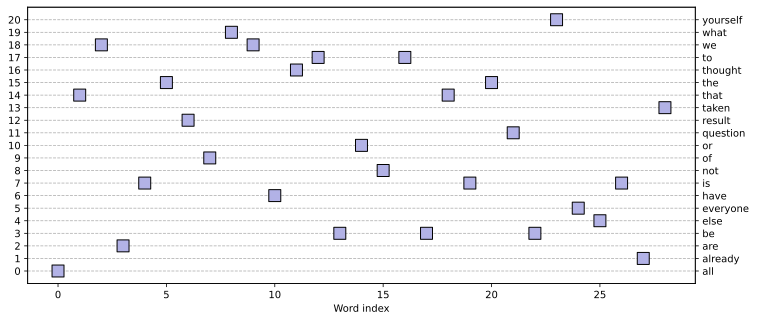

In [30]:
alltext = ' '.join(text)
tokens = encoder(alltext)

# create a figure
_,ax  = plt.subplots(1,figsize = (12,5))

# plot the tokens
ax.plot(tokens,'ks',markersize=12, markerfacecolor=[.7,.7,.9])
ax.set(xlabel = 'Word index', yticks = range(len(vocab)))
ax.grid(linestyle = '--', axis='y')

#invisible axis for right hand side labels
ax2 = ax.twinx()
ax2.plot(tokens,alpha=0)
ax2.set(yticks = range(len(vocab)), yticklabels = vocab)

## Explore context surrounding target tokens

In [31]:
# find all indices of 'to'
# print each target and its context (tokens before and after the target tokens)
targetWord = 'to'
targetIdx = word2idx[targetWord]

#find the indices
targetLocs = np.where(np.array(allwords) == targetWord)[0]
print(f'"{targetWord}" appear at indices {targetLocs}\n\n')

# print context
for t in targetLocs:
    print(tokens[t-1:t+2])
    print(' '.join(allwords[t-1:t+2]),'\n')

"to" appear at indices [12 16]


[16, 17, 3]
thought to be 

[8, 17, 3]
not to be 



## One hot encoding

In [33]:
# Here in the matrix: rows corrs. to a token and column corrs. to an item in vocab
word_matrix = np.zeros((len(allwords), len(vocab)), dtype = int)

#create the matrix
for i, word in enumerate(allwords):
    word_matrix[i, word2idx[word]] = 1

print(f'One hot matix is of size {word_matrix.shape} \n')
print(word_matrix)

One hot matix is of size (29, 21) 

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0

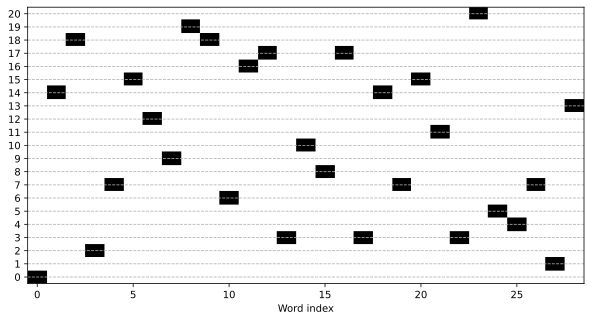

In [37]:
# the image of one hot encoding is same as above

_,ax = plt.subplots(1, figsize=(10,5))

plt.imshow(1-word_matrix.T, cmap = 'gray', origin = 'lower', aspect = 'auto')
ax.set(xlabel = 'Word index', yticks = range(len(vocab)))
ax.grid(linestyle='--', axis='y')
plt.show()